<a href="https://colab.research.google.com/github/tintenderete/TFM/blob/main/individuos2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# class Creacion_inidividuos():

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape, ConvLSTM2D, Conv3D, TimeDistributed, Flatten
import keras
import tensorflow as tf
class Creacion_inidividuos():

  def __init__(self):
    self.a = 0


  def get_layer(self, layer_type, info):
    if  layer_type == 0:
      return               (     Dense(                            activation=info[0],   units=info[1] )                                          ,-1)   # xD
    elif layer_type == 1:
      return                (     TimeDistributed(Dense(            activation=info[0],   units=info[1] ))                                        , 4)  # Menos de 3 no funciona
    elif layer_type == 2:
      return               (     ConvLSTM2D(                       activation=info[0],   filters=info[1],   kernel_size=info[2],  padding='same') ,5)# 5D
    elif layer_type == 3:
      return                (    Conv3D(                           activation=info[0],   filters=info[1],   kernel_size=info[2],  padding='same')                  ,5)# 5D
    elif layer_type == 4:
      return                (     ConvLSTM1D(                       activation=info[0],   filters=info[1],   kernel_size=info[2] ,  padding='same')               ,4)# 4D
    elif layer_type == 5:
      return                 (    Conv2D(                           activation=info[0],   filters=info[1],   kernel_size=info[2] ,  padding='same')              ,4)# 4D 
    elif layer_type == 6:
      return                 (    LSTM(                                                   units=info[1])                                         ,3) # 3D
    elif layer_type == 7:
      return                  (   GRU(                                                    units=info[1])                                          ,3)# 3D
    

crear = Creacion_inidividuos()

# AUMENTAR Y DISMINUIR DIMENSIONES

In [2]:
def aumenta_dimensions(model):
  return tuple( tf.expand_dims(model, axis=-1).shape[1:].as_list() )

In [3]:
def reduce_dimensions(shape):
  d = list(shape[1:])
  new_shape = d[:-2] + [d[-2] * d[-1]]
  return tuple(new_shape)

# TEST CREACION

In [10]:
info =  ["tanh",3,2]

In [8]:
x = np.random.rand(100, 60, 35, 3)
y = np.random.rand(100, 35)

In [68]:
# pongo -1 para que todos los individuos no tengan el mismo numero de capas, si sale -1 se corta la cadena
individuos = np.random.randint(-1, 8, (1000, 10))
#individuos = np.random.randint(0, 8, (1, 10))

In [69]:
ind = individuos[0]
ind

array([ 2, -1,  0,  4,  1, -1,  6,  4,  0, -1])

In [31]:
#individuos[0][3] = -1
#individuos[0]

array([ 0,  7,  1, -1,  5,  1,  0,  1,  2,  0])

In [70]:
debug = False
estadisticas = True
model_parametros_entrenables_totales = []
model_layers_totales = []

for ind in individuos:

  inputs = keras.Input(shape=(x.shape[1:]))
  m = inputs

  for gen in ind:
    #gen = ind[count]
    #count += 1

    if gen != -1:

      #print("count: " + str(count) + " gen: " + str(gen))
      new_layer , dim_layer = crear.get_layer(gen, info)

      current_m_dim = len(m.shape) 
      new_layer_dim = current_m_dim if dim_layer == -1 else dim_layer 
      diferencia = new_layer_dim - current_m_dim

      if debug :
        print("---------------------")
        print("current_m_dim: " +  str(m.shape))
        print("new_layer_name: " + str(new_layer.name) + " dim: " + str(diferencia))
      
      

      while diferencia != 0:
        
        if diferencia > 0:
          #m = Reshape( tuple( tf.expand_dims(m, axis=-1).shape[1:].as_list() ) ) (m)
          new_d = aumenta_dimensions(m)
          m = Reshape(new_d)(m)
        elif diferencia < 0:
          new_d = reduce_dimensions(m.shape)
          m = Reshape(new_d)(m)
          
        
        current_m_dim = len(m.shape) 
        new_layer_dim = current_m_dim if dim_layer == -1 else dim_layer 
        diferencia = new_layer_dim - current_m_dim

        if debug :
          print("fixed_new_m_dim: " +  str(m.shape))

      m = new_layer(m)

      if debug:
        print("new_m_dim: " +  str(m.shape))

    else:
      break


  m = Flatten()(m)
  outputs = Dense(y.shape[1])(m)
  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(
    loss='mse',
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
  )

  # ESTADISTICAS
  if estadisticas:
    total_params = sum([np.prod(v.get_shape()) for v in model.trainable_weights])
    non_trainable_params = sum([np.prod(v.get_shape()) for v in model.non_trainable_weights])
    trainable_params = total_params - non_trainable_params

    model_parametros_entrenables_totales.append(trainable_params)

    if debug:
      print("Total params: ", total_params)
      print("Trainable params: ", trainable_params)
      print("Non-trainable params: ", non_trainable_params)

    # Calcular el número de capas
    num_layers = len(model.layers)

    model_layers_totales.append(num_layers)

    if debug:
      print("Number of layers: ", num_layers)


In [71]:
len(model_parametros_entrenables_totales) , len(model_layers_totales)

(1000, 1000)

# analisis parametros y layers de los modelso creados

In [72]:
import matplotlib.pyplot as plt

(array([810.,   0.,   0., 159.,   0.,   0.,   0.,   0.,   0.,  31.]),
 array([3.800000e+02, 6.650930e+04, 1.326386e+05, 1.987679e+05,
        2.648972e+05, 3.310265e+05, 3.971558e+05, 4.632851e+05,
        5.294144e+05, 5.955437e+05, 6.616730e+05]),
 <BarContainer object of 10 artists>)

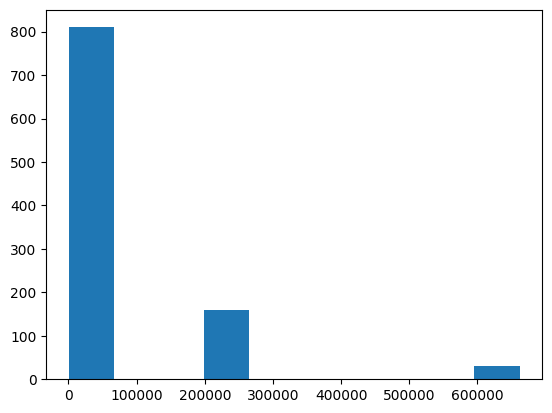

In [73]:
plt.hist(model_parametros_entrenables_totales)

(array([210., 116.,  80., 103.,  52., 100., 158., 105.,  63.,  13.]),
 array([ 3. ,  5.6,  8.2, 10.8, 13.4, 16. , 18.6, 21.2, 23.8, 26.4, 29. ]),
 <BarContainer object of 10 artists>)

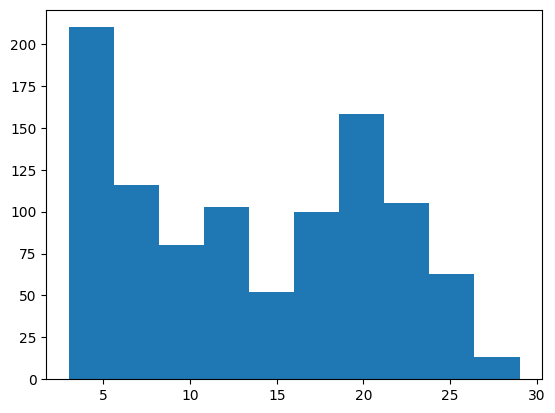

In [74]:
plt.hist(model_layers_totales)

In [75]:
"""
tengo 1000 individuos con 10 capas cada uno deberia ver:
"""
1000 * 10 # capas 

10000

In [78]:
# cantidad de layers entre todos los modelos
sum(model_layers_totales)

13534

In [84]:
# % capas redimension
(13534 * 100) / 10000 - 100

35.34

# INDIVIDUOS 3

In [ ]:
"""

¿ que pasos podria dar ? 

  - mejorar aquitectura: 
      - implementacion de capas mas robusta 
      - dejar todo en una misma clase/s
      

  - añadir complejidad en genes para parametros de capa aleatorios

"""

# test arquitectura agregado y acceso de capas

##registro de layers

In [94]:
layers = []

In [95]:
layers.append( lambda info : Conv2D(  activation=info[0], filters=info[1],  kernel_size=info[2],  padding='same') )

In [96]:
layers.append( lambda info : Dense(   activation=info[0], units=info[1] ) )

## crear modelo

In [97]:
inputs = keras.Input(shape=(x.shape[1:]))
m = inputs

In [98]:
info = ('tanh', 33, 3)

In [99]:
m = layers[0](info)(m)
m.shape

TensorShape([None, 60, 35, 33])

In [100]:
info = ('tanh', 66, 3)

In [101]:
m = layers[1](info)(m)
m.shape

TensorShape([None, 60, 35, 66])

In [102]:
m = Flatten()(m)
outputs = Dense(y.shape[1])(m)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(
  loss='mse',
  optimizer=keras.optimizers.Adam(),
  metrics=["accuracy"],
)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 60, 35, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 35, 33)        924       
                                                                 
 dense_17 (Dense)            (None, 60, 35, 66)        2244      
                                                                 
 flatten_3 (Flatten)         (None, 138600)            0         
                                                                 
 dense_18 (Dense)            (None, 35)                4851035   
                                                                 
Total params: 4,854,203
Trainable params: 4,854,203
Non-trainable params: 0
_________________________________________________________________


# test creacion individuos con genes mas complejos, no solo tipo de capa

In [112]:
test_arr = np.array([1,2,3,1,2,3,1,2,3])
test_arr

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [121]:
test_arr[0::3]

array([1, 1, 1])

In [119]:
test_arr[1::3]

array([2, 2, 2])

In [120]:
test_arr[2::3]

array([3, 3, 3])

## creacion genes aleatorios

In [ ]:
# GEN ( tipo layer , units/filters)

In [137]:
len_gen = 2
num_genes = 4 
size_cadena = len_gen * num_genes
num_individuos = 2

rango_minimo_layers = 0
rango_maximo_layers = 5

rango_minimo_units = 1
rango_maximo_units = 100

In [142]:
layers_random = np.random.randint(rango_minimo_layers, rango_maximo_layers, (num_individuos, num_genes))
layers_random

array([[2, 3, 1, 0],
       [2, 4, 1, 0]])

In [143]:
units_random = np.random.randint(rango_minimo_units, rango_maximo_units, (num_individuos, num_genes))
units_random

array([[94, 47, 75, 25],
       [57, 92, 96, 60]])

In [162]:
individuos = np.zeros((num_individuos, size_cadena), dtype=int)
individuos

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

## asignacion de genes aleatorios

In [163]:
individuos[:,::len_gen] = layers_random

In [164]:
individuos[:,1::len_gen] = units_random

In [165]:
individuos

array([[ 2, 94,  3, 47,  1, 75,  0, 25],
       [ 2, 57,  4, 92,  1, 96,  0, 60]])